# Breast Cancer Predicition Using L-Layer Deep Neural Network

Breast cancer is the second most common cancer among women in the United States (some kinds of skin cancer are the most common). Black women die from breast cancer at a higher rate than White women. It's important to understand that most breast lumps are benign and not cancer (malignant). Non-cancerous breast tumors are abnormal growths, but they do not spread outside of the breast. They are not life threatening, but some types of benign breast lumps can increase a woman's risk of getting breast cancer.

A tumor can be **benign (not dangerous to health)** or **malignant (has the potential to be dangerous)**. Benign tumors are not considered cancerous: their cells are close to normal in appearance, they grow slowly, and they do not invade nearby tissues or spread to other parts of the body. Malignant tumors are cancerous.

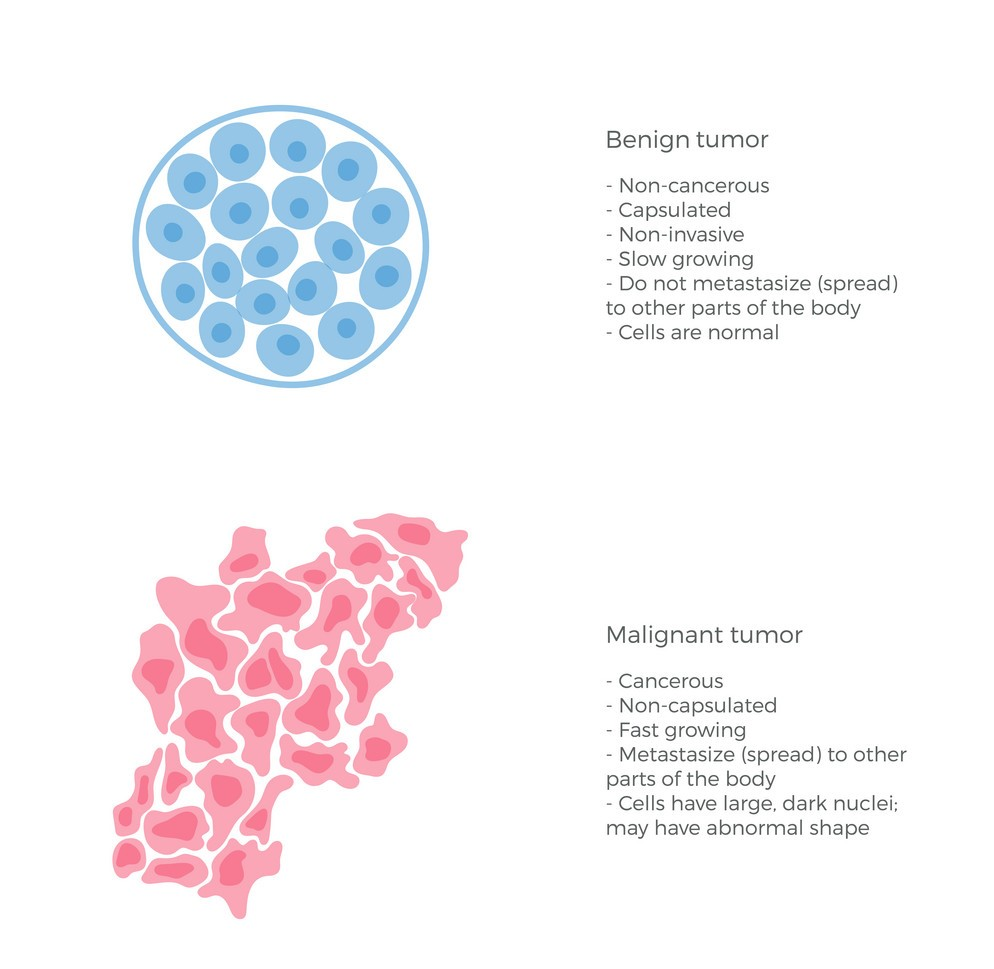

## Dataset
[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Dataset Information

* Dataset Characteristics: Multivariate
* Attribute Characteristics: Real
* Attribute Characteristics: Classification
* Number of Instances: 569
* Number of Attributes: 32
* Missing Values: No



## Column Names and Meanings

* id: ID number
* diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
* radius_mean: mean of distances from center to points on the perimeter
* texture_mean: standard deviation of gray-scale values
* perimeter_mean: mean size of the core tumor
* area_mean: area of the tumor
* smoothness_mean: mean of local variation in radius lengths
* compactness_mean: mean of perimeter^2 / area - 1.0
* concavity_mean: mean of severity of concave portions of the contour
* concave_points_mean: mean for number of concave portions of the contour
* symmetry_mean
* fractal_dimension_mean: mean for "coastline approximation" - 1
* radius_se: standard error for the mean of distances from center to points on the perimeter
* texture_se: standard error for standard deviation of gray-scale values
* perimeter_se
* area_se
* smoothness_se: standard error for local variation in radius lengths
* compactness_se: standard error for perimeter^2 / area - 1.0
* concavity_se: standard error for severity of concave portions of the contour
* concave_points_se: standard error for number of concave portions of the contour
* symmetry_se
* fractal_dimension_se: standard error for "coastline approximation" - 1
* radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
* perimeter_worst
* area_worst
* smoothness_worst: "worst" or largest mean value for local variation in radius lengths
* compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
* concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
* concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
* symmetry_worst
* fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1



### Importing Required Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
cancer_data = pd.read_csv("D:\\project\\data.csv")

In [ ]:
cancer_df = pd.DataFrame(cancer_data)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer_df.drop(["id", "Unnamed: 32"], axis = 1, inplace=True)

In [ ]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
cancer_df.diagnosis = [1 if i == "M" else 0 for i in cancer_df.diagnosis]

In [ ]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = cancer_df.drop(["diagnosis"], axis = 1)

In [ ]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = cancer_df["diagnosis"].values

### Normalization 

x = ( x - min(x) ) / ( max(x) - min(x) )

In [ ]:
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values    # (x-min(x))/(max(x)-minx)) -> Normalization formula

In [ ]:
x #Normalized_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### Creating Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [ ]:
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

xtrain shape: (455, 30)
xtest shape: (114, 30)
ytrain shape: (455,)
ytest shape: (114,)


In [ ]:
y_train = np.reshape(ytrain,(455,1)).T
y_test = np.reshape(ytest,(114,1)).T

In [ ]:
x_train = xtrain.T
x_test = xtest.T

In [ ]:
x_train

,345,107,16,361,353,223,513,46,190,428,...,258,133,278,564,229,70,132,289,109,480
radius_mean,0.155190,0.254579,0.364381,0.299068,0.383312,0.415022,0.359648,0.057504,0.342610,0.196365,...,0.410762,0.413129,0.312793,0.690000,0.276823,0.565999,0.434427,0.207724,0.206304,0.245113
texture_mean,0.169090,0.298613,0.352384,0.401082,0.542103,0.356442,0.133581,0.241123,0.453500,0.233683,...,0.456206,0.142712,0.274941,0.428813,0.426784,0.392289,0.400068,0.310450,0.390599,0.281366
perimeter_mean,0.154861,0.243383,0.352083,0.286435,0.374611,0.406399,0.348974,0.054730,0.349527,0.184369,...,0.458918,0.402253,0.293345,0.678668,0.286573,0.551517,0.431276,0.196116,0.198259,0.238408
area_mean,0.075546,0.137094,0.229480,0.170774,0.243097,0.262057,0.218579,0.024772,0.197837,0.100785,...,0.267232,0.262227,0.181888,0.566490,0.152577,0.418452,0.282630,0.107105,0.107317,0.132259
smoothness_mean,0.416990,0.290151,0.415636,0.299630,0.449309,0.450212,0.412476,0.301255,0.495351,0.260720,...,0.526045,0.379074,0.242394,0.526948,0.507087,0.338178,0.434865,0.311456,0.315609,0.345220
compactness_mean,0.221489,0.149592,0.161401,0.136035,0.240200,0.309858,0.214097,0.122845,0.680694,0.058156,...,0.895712,0.230783,0.064843,0.296055,0.492362,0.256181,0.334397,0.094166,0.142231,0.180970
concavity_mean,0.083903,0.061926,0.173266,0.078351,0.289363,0.268744,0.192643,0.037207,0.464152,0.032076,...,0.744142,0.167174,0.046790,0.571462,0.397142,0.253046,0.244377,0.056209,0.120267,0.068322
concave points_mean,0.101243,0.095477,0.261382,0.120477,0.325696,0.321173,0.216153,0.029409,0.328926,0.068091,...,0.684394,0.294881,0.061531,0.690358,0.341004,0.395179,0.278976,0.108002,0.094384,0.075895
symmetry_mean,0.289394,0.273737,0.265657,0.381313,0.296465,0.441919,0.342929,0.358081,0.668687,0.227778,...,0.724747,0.381818,0.259091,0.336364,0.536869,0.263636,0.555556,0.481313,0.215657,0.204040
fractal_dimension_mean,0.423126,0.225358,0.195029,0.147430,0.309183,0.275274,0.135636,0.317397,0.536226,0.242628,...,0.654591,0.153117,0.110362,0.132056,0.475569,0.097936,0.188500,0.201980,0.322873,0.271272


### Activation Functions

In [ ]:
def relu(x):
    cache = x
    return np.maximum(x,0),cache

In [ ]:
def sigmoid(x):
    cache = x
    return 1/(1 + np.exp(-x)),cache

### Initializing Parameters

In [ ]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [ ]:

def linear_forward(A, W, b):

    z = np.dot(W,A) + b
    cache = (A, W, b)
    return z,cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        z,linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(z)
        
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)

    return A, cache

### Forward Propogation

In [ ]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)],parameters["b"+str(l)], "relu")
        caches.append(cache)
       
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)],parameters["b"+str(L)], "sigmoid")
    caches.append(cache)
   
    return AL, caches

### Cost Function

In [ ]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = np.dot(np.log(AL),Y.T)+np.dot(np.log(1-AL),(1-Y).T)
    cost = cost*-1/m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

### Backward Propogation

In [ ]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

In [ ]:
def sigmoid_derivative(x):
    s,cache= sigmoid(x)
    ds = s*(1-s)
    return ds

In [ ]:
def relu_backward(dA, activation_cache):
    z = activation_cache
    x,cache = relu(z)
    return dA*x

In [ ]:
def sigmoid_backward(dA, activation_cache):
    z = activation_cache
    return dA*sigmoid_derivative(z)

In [ ]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ =  relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        
    elif activation == "sigmoid":
        dZ =  sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    
    return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
   
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, "sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    for l in reversed(range(L-1)):
        current_cache =  caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward( dA_prev_temp, current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
         
        
    return grads

### Model

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 1.2, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost
   
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)   
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

### Updating Parameters

In [ ]:
def update_parameters(params, grads, learning_rate):
 
    parameters = params.copy()
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
        
    return parameters

In [ ]:
parameters, costs = L_layer_model(x_train, y_train, [30,3,1], num_iterations = 1000, print_cost = True)

Cost after iteration 0: 0.6931377783946141
Cost after iteration 100: 0.6641349448281477
Cost after iteration 200: 0.6636105592754961
Cost after iteration 300: 0.22368076308973966
Cost after iteration 400: 0.09968103437135235
Cost after iteration 500: 0.08250544878650948
Cost after iteration 600: 0.07626021033431646
Cost after iteration 700: 0.0740609078157506
Cost after iteration 800: 0.07272460023964589
Cost after iteration 900: 0.05916973721572399
Cost after iteration 999: 0.057619432236203985


### Predicition

In [ ]:
def predict(parameters, X):
    
    A2, cache = L_model_forward(X, parameters)
    
    predictions = (A2 > 0.5)
    
    return predictions

In [ ]:
predictions = predict(parameters, x_test)
print ('Accuracy: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T)) / float(y_test.size) * 100) + '%')

Accuracy: 100%
